In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the data

df = pd.read_csv('ks-projects-201801.csv', encoding="ISO-8859-1")
df.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.shape

(378661, 15)

In [4]:
# Drop duplicates
df = df.drop_duplicates(keep= 'first')

# Check the shape 
df.shape


(378661, 15)

In [5]:
# Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 46.2+ MB


In [6]:
df["launched"] = pd.to_datetime(df["launched"])
df["month_launched"] = df["launched"].dt.month
df['name'] = df['name'].astype('str')
df["num_words_for_project"] = df["name"].apply(lambda x: len(x.split()))
df["goal"] = df["goal"].dropna().apply(np.int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                       378661 non-null int64
name                     378661 non-null object
category                 378661 non-null object
main_category            378661 non-null object
currency                 378661 non-null object
deadline                 378661 non-null object
goal                     378661 non-null int64
launched                 378661 non-null datetime64[ns]
pledged                  378661 non-null float64
state                    378661 non-null object
backers                  378661 non-null int64
country                  378661 non-null object
usd pledged              374864 non-null float64
usd_pledged_real         378661 non-null float64
usd_goal_real            378661 non-null float64
month_launched           378661 non-null int64
num_words_for_project    378661 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(7)
memory 

In [8]:
# Check the stats
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,month_launched,num_words_for_project
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,6.461550,5.678768
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,3.330133,2.750090
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1.000000,1.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,4.000000,3.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,7.000000,5.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,9.000000,8.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,12.000000,29.000000


In [9]:
# Function to remove outliers

def remove_outliers(data_frame, column_list, low=0.05, high=0.80):
   for column in column_list:
       this_column = data_frame[column]
       quant_df = this_column.quantile([low,high])
       low_limit = quant_df[low]
       high_limit = quant_df[high]
       data_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
   return data_frame

# Remove outlier
columns_outlier = ['goal']

news_train_df = remove_outliers(df, columns_outlier)

In [10]:
# Check the stats
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,month_launched,num_words_for_project
count,3.786610e+05,378661.000000,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000
mean,1.074731e+09,8774.838156,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,6.461550,5.678768
std,6.190862e+08,7688.709150,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,3.330133,2.750090
min,5.971000e+03,400.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1.000000,1.000000
25%,5.382635e+08,2000.000000,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,4.000000,3.000000
50%,1.075276e+09,5200.000000,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,7.000000,5.000000
75%,1.610149e+09,16000.000000,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,9.000000,8.000000
max,2.147476e+09,20800.000000,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,12.000000,29.000000


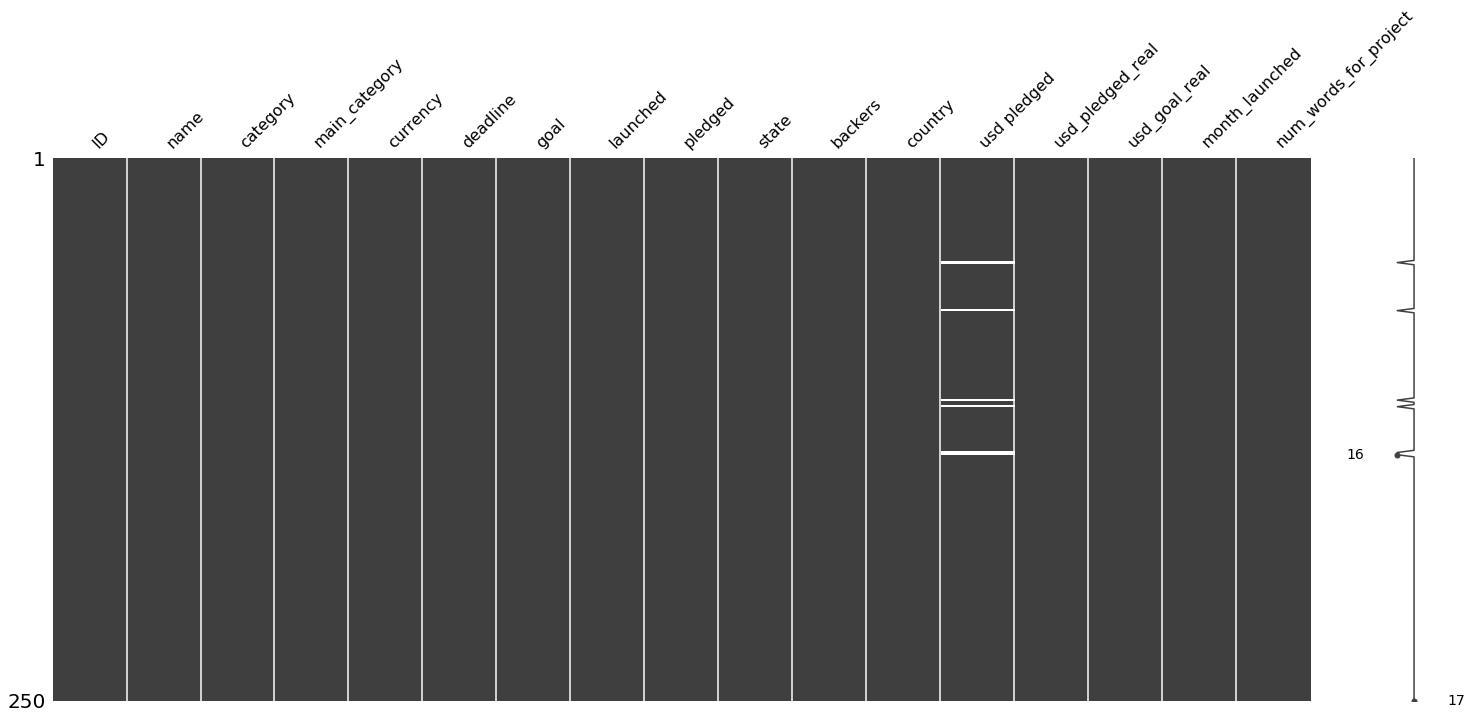

In [11]:
#Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [12]:
#Drop all nan's in the dataset at once

df.dropna(inplace=True)

In [13]:
df.shape

(374864, 17)

In [14]:
# Find how many unique values
df.nunique()

ID                       374864
name                     372069
category                    159
main_category                15
currency                     14
deadline                   3164
goal                       4940
launched                 374302
pledged                   61936
state                         5
backers                    3963
country                      22
usd pledged               95455
usd_pledged_real         105383
usd_goal_real             50032
month_launched               12
num_words_for_project        23
dtype: int64

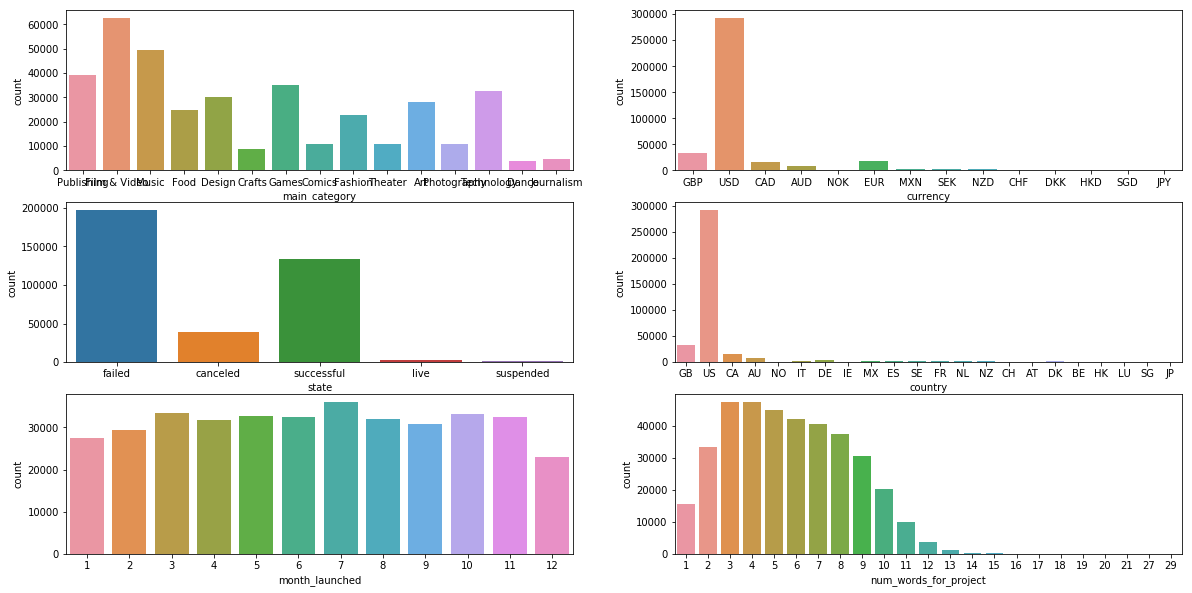

In [15]:
# Visual to see many count plots at once

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.countplot(df['main_category'], ax=ax[0,0])
sns.countplot(df['currency'], ax=ax[0,1])
sns.countplot(df['state'], ax=ax[1,0])
sns.countplot(df['country'], ax=ax[1,1])
sns.countplot(df['month_launched'], ax=ax[2,0])
sns.countplot(df['num_words_for_project'], ax=ax[2,1])


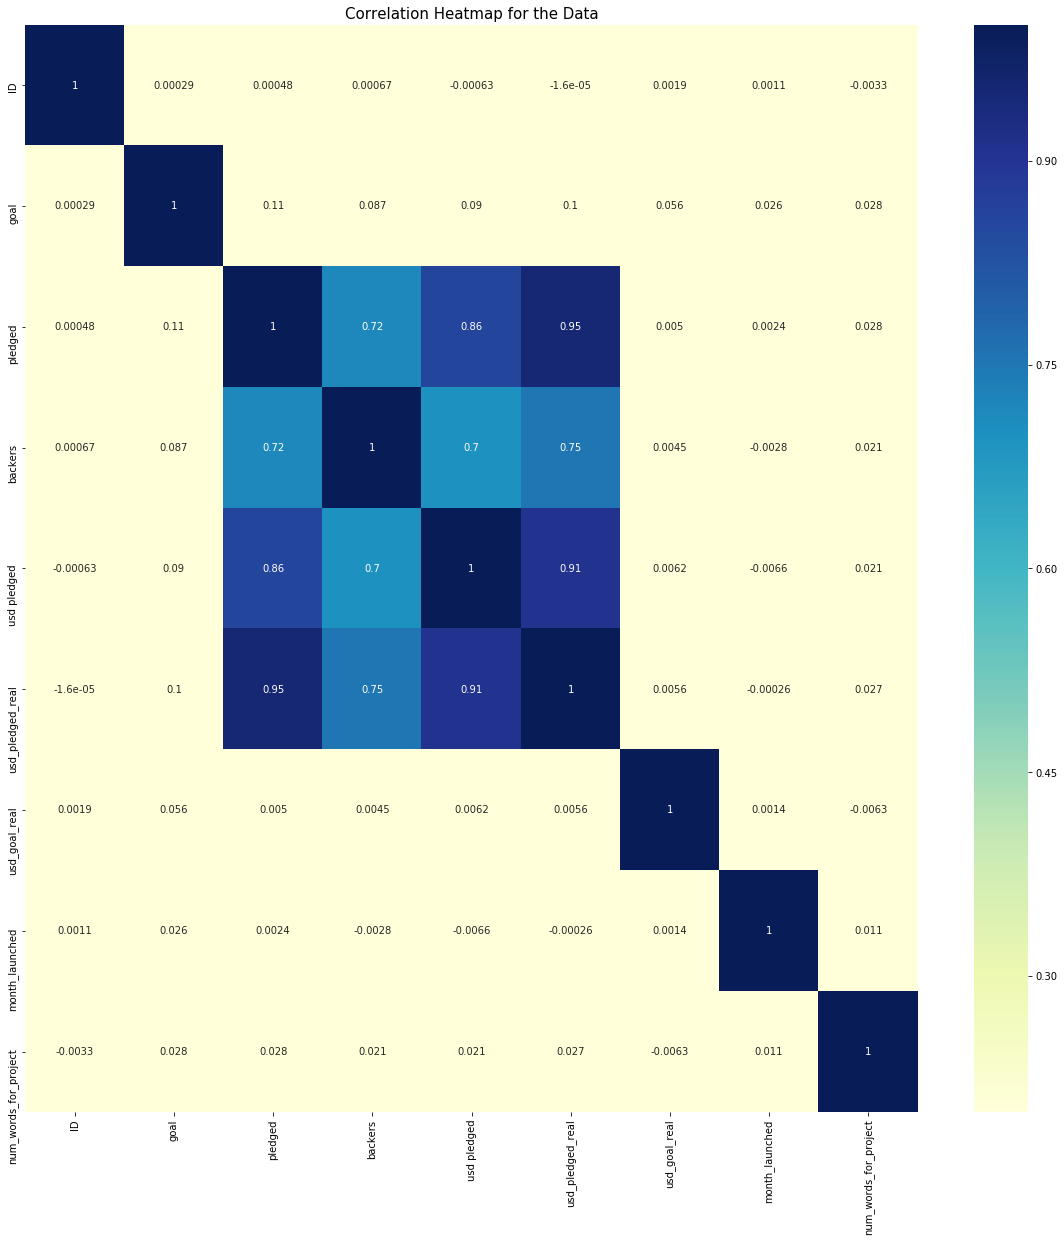

In [16]:
# Heat Map of correlations

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax, vmin=.2)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

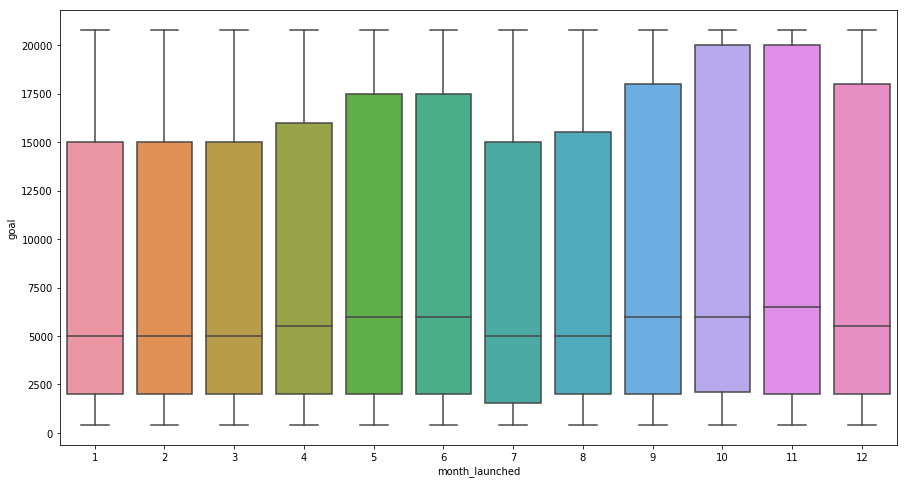

In [17]:
# Box plot

plt.figure(figsize=(15,8))
sns.boxplot(x="month_launched", y="goal", data=df)
plt.show()

In [18]:
#Pre-Process Data

# df['target'] = np.where((df['state']=='successful') & (df['state']=='live'),1,0)
df["target"] = df["state"].apply(lambda x: 1 if x=="successful" else 0)


CaT = pd.get_dummies(df["main_category"], prefix='category_')
Ctry = pd.get_dummies(df["country"], prefix='country_')

df = pd.concat([df, CaT, Ctry],axis=1)

df.drop(['usd pledged', 'usd_pledged_real','usd_goal_real', 'main_category', 'ID', 'state', 'category',
        'currency', 'deadline', 'name', 'country', 'launched', 'pledged', 'backers'], axis=1, inplace=True)

df.head()

,goal,month_launched,num_words_for_project,target,category__Art,category__Comics,category__Crafts,category__Dance,category__Design,category__Fashion,...,country__IT,country__JP,country__LU,country__MX,country__NL,country__NO,country__NZ,country__SE,country__SG,country__US
0,1000,8,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20800,9,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20800,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000,3,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,19500,7,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# df['target'].plot(kind='pie')

In [20]:
#Split data into training and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

y_train = train['target']
y_test = test['target']

X_train = train.drop(['target'], axis=1)
X_test = test.drop(['target'], axis=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model


def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv


# Random Forest Classifier ----------------------------------------------------------------

train_pred_log, acc_log, acc_cv_rfor = fit_ml_algo(RandomForestClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Logistic Regression ---------------------------------------------------------------------

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# K-Nearest Neighbours --------------------------------------------------------------------

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Gaussian Naive Bayes --------------------------------------------------------------------

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

# Linear SVC --------------------------------------------------------------------------------

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)

# Stochastic Gradient Descent ----------------------------------------------------------------

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)

# Decision Tree Classifier ------------------------------------------------------------------

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

# Gradient Boosting Trees -------------------------------------------------------------------

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, m

In [22]:
models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
6,Decision Tree,80.69
1,KNN,71.93
7,Gradient Boosting Trees,67.60
2,Logistic Regression,64.92
3,Naive Bayes,63.57
0,RandomForestClassifier,63.48
5,Linear SVC,39.21
4,Stochastic Gradient Decent,35.75


Text(0.5, 0, 'Importance')

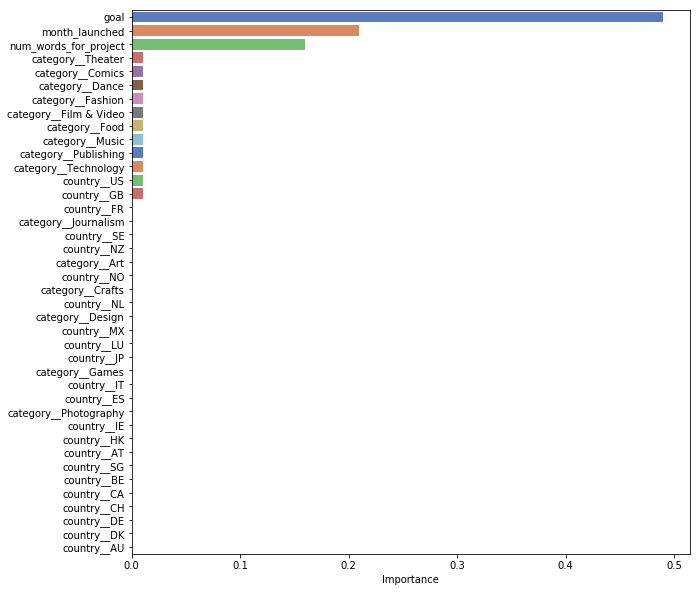

In [23]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

f_im = clf.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')

In [31]:
df_final = pd.read_csv('ks-projects-201801.csv', encoding="ISO-8859-1")

df_final['name'] = df_final['name'].astype('str')
df_final["num_words_for_project"] = df_final["name"].apply(lambda x: len(x.split()))

remove_outliers(df_final, columns_outlier)

df_final["target"] = df_final["state"].apply(lambda x: 1 if x=="successful" else 0)

df_final.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,num_words_for_project,target
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,6,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,20800.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,8,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,20800.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,3,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,7,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,8,0


In [32]:
df_final.drop(['usd pledged', 'usd_pledged_real','usd_goal_real', 'main_category', 'ID', 'state', 'category',
         'currency', 'deadline', 'name', 'country', 'pledged', 'backers', 'launched'], axis=1, inplace=True)

df_final.head()

,goal,num_words_for_project,target
0,1000.0,6,0
1,20800.0,8,0
2,20800.0,3,0
3,5000.0,7,0
4,19500.0,8,0


In [33]:
#Choose model - Need to fix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


train, test = train_test_split(df_final, test_size=0.2)

y_train = train['target']
y_test = test['target']

X_train = train.drop(['target'], axis=1)
X_test = test.drop(['target'], axis=1)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# save the model to disk


0.650310960875708


In [34]:
import pickle


pickle.dump(model, open('tranform.pkl', 'wb'))
filename = 'kickstarter_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.650310960875708


In [ ]:
#0.648911306827935